C:\Users\ajed8\AppData\Local\Temp\ipykernel_3028\2392198390.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


Best Hyperparameters: {'C': 10}
Best Score: 0.8646441372247823


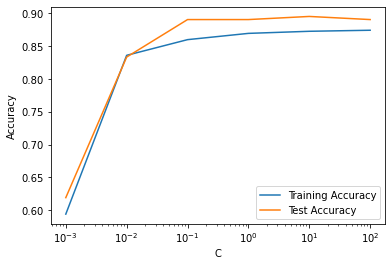

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("Cleaned.csv")

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Try different values of C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Iterate over different values of C
for C in C_values:
    # Create a Logistic Regression classifier with current C value
    logistic_regression = LogisticRegression(C=C)

    # Fit the model on the training set
    logistic_regression.fit(X_train, y_train)

    # Record training set accuracy
    training_accuracy.append(logistic_regression.score(X_train, y_train))

    # Record test set accuracy
    test_accuracy.append(logistic_regression.score(X_test, y_test))

# Plot the training and test accuracies
plt.plot(C_values, training_accuracy, label="Training Accuracy")
plt.plot(C_values, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xscale('log')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import classification_report

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Fit the model with the best hyperparameters using the training set
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_logistic_regression.predict(X_test)

print("Test Accuracy:", best_logistic_regression.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Best Hyperparameters: {'C': 10}
Best Score: 0.8646441372247823
Test Accuracy: 0.8952380952380953
Classification Report:
              precision    recall  f1-score   support

           0      0.931     0.885     0.908       122
           1      0.851     0.909     0.879        88

    accuracy                          0.895       210
   macro avg      0.891     0.897     0.893       210
weighted avg      0.898     0.895     0.896       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


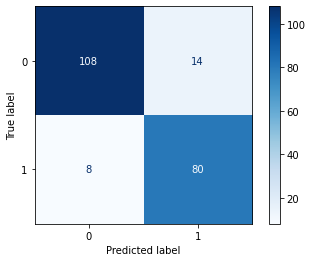

In [9]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_logistic_regression, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [8]:
import joblib

joblib.dump(best_logistic_regression, 'best_lr_model.pkl')

['best_lr_model.pkl']

In [4]:
y_scores = best_logistic_regression.predict_proba(X)[:, 1]

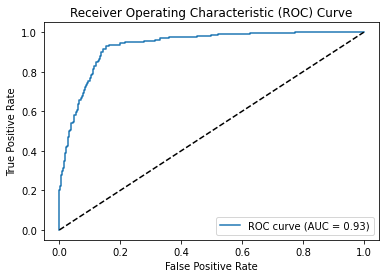

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
auc

0.9313037785260008